In [98]:
import DSGRN

In [99]:
network = DSGRN.Network('x0 : -x0 - x0 x1\n x1 : - x1 - x1 x0', 'Ecology')

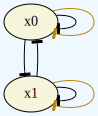

In [100]:
DSGRN.DrawGraph(network)

In [101]:
print('inputs:', network.inputs(0), network.inputs(1))
print('outputs:', network.outputs(0), network.outputs(1))
print('logics:', network.logic(0), network.logic(1))

inputs: [0, 0, 1] [1, 0, 1]
outputs: [0, 0, 1] [0, 1, 1]
logics: [[0], [0, 1]] [[1], [0, 1]]


In [102]:
network.domains()

[4, 4]

In [103]:
parametergraph = DSGRN.ParameterGraph(network)

In [104]:
print("There are " + str(parametergraph.size()) + " nodes in the parameter graph.")

There are 9216 nodes in the parameter graph.


In [105]:
par_index = 1273

In [106]:
parameter = parametergraph.parameter(par_index)

In [107]:
print(parameter)

[["x0",[3,3,"FFFEC8"],[2,0,1]],["x1",[3,3,"FFFFF8"],[0,1,2]]]


In [108]:
domaingraph = DSGRN.DomainGraph(parameter)

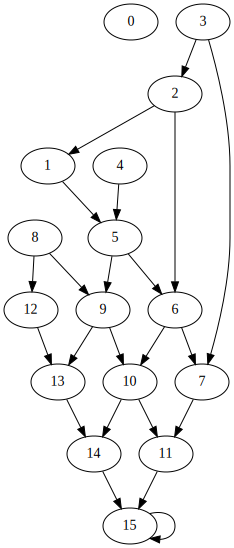

In [109]:
DSGRN.DrawGraph(domaingraph)

In [110]:
morsedecomposition = DSGRN.MorseDecomposition(domaingraph.digraph())

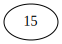

In [111]:
DSGRN.DrawGraph(morsedecomposition)

In [112]:
morsegraph = DSGRN.MorseGraph(domaingraph, morsedecomposition)

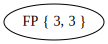

In [113]:
DSGRN.DrawGraph(morsegraph)